In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math


# Part 2: Function Approximation 

In [125]:
class MLP:
    def __init__(self, x, label, lr, hidden_layers=5):
        self.W = np.random.randn(hidden_layers, 3)
        self.V = np.random.randn(1, hidden_layers+1)
        self.X = np.vstack((x, np.ones((1,x.shape[1]))))
        self.lr = lr
        self.hidden_layers = hidden_layers
        self.label = label
        self.alpha = 0.9
        self.dw = 0
        self.dv = 0
        
    def mse(self):
        _, out = self.forward_pass() 
        
        result = (out - self.label) ** 2 
        
        return result.sum() / self.X.shape[1]
        
    def transfer_func(self, np_arr):
        return 2 / (1 + np.exp(-1 * np_arr)) -1 
    
    def forward_pass(self):
        hin = np.dot(self.W, self.X)
        hout = np.vstack((self.transfer_func(hin), np.ones((1, self.X.shape[1]))))
        
        oin = self.V @ hout
        out = self.transfer_func(oin)
        
        return hout, out
    
    def backward_pass(self):
        hout, out = self.forward_pass() 
        
        delta_o = np.multiply(out - self.label,(np.multiply(1+out, 1-out) * 0.5))
        delta_h = np.multiply((self.V.T @ delta_o), (np.multiply(1+hout, 1-hout) * 0.5))
        delta_h = delta_h[1:self.hidden_layers+1, :]
    
        return delta_h, delta_o, hout
    
    def weight_update(self):
        delta_h, delta_o, hout = self.backward_pass()
        
        self.dw = np.multiply(self.dw, self.alpha) - np.multiply(delta_h @ self.X.T, (1-self.alpha))
        self.dv = np.multiply(self.dv, self.alpha) - np.multiply(delta_o @ hout.T, (1-self.alpha))
        
        self.W = self.W + self.dw * self.lr
        self.V = self.V + self.dv * self.lr 
        
    def error_class(self):
        _, out = self.forward_pass()
        
        #Threshold 
        out[out > 0] = 1
        out[out < 0] = -1 
        
        out = out + self.label
        
        return np.count_nonzero(out==0)/self.label.shape[1]
        
        
    
    def train(self, epoch):
        for i in range(epoch):
            #print(f"Epoch: {i}, {self.error_class()}")
            print(f"Epoch({i}) MSE : {fapprox.mse()}")
            self.weight_update() 
            
            

        
    
    
    
mlp = MLP(dataset, label, 0.01, 10)
#mlp.train(10)
    

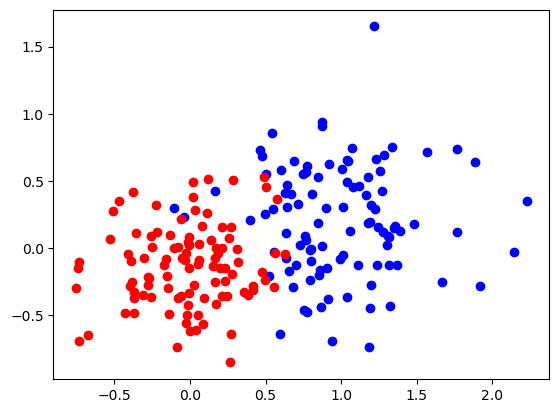

In [126]:
n = 100 
mA = np.array([1.0, 0.3])
sigmaA = 0.4
mB = np.array([0.0, -0.1])
sigmaB = 0.3 


classA = np.vstack((np.random.randn(1, 100) * sigmaA + mA[0], np.random.randn(1, 100) * sigmaA + mA[1]))
classB = np.vstack((np.random.randn(1, 100) * sigmaB + mB[0], np.random.randn(1, 100) * sigmaB + mB[1]))
matplotlib.pyplot.scatter(x=classA[0], y=classA[1], color="blue")
matplotlib.pyplot.scatter(x=classB[0], y=classB[1], color="red")

dataset = np.hstack((classA, classB))
label = np.hstack((np.ones((1,100)), np.full((1, 100), -1)))

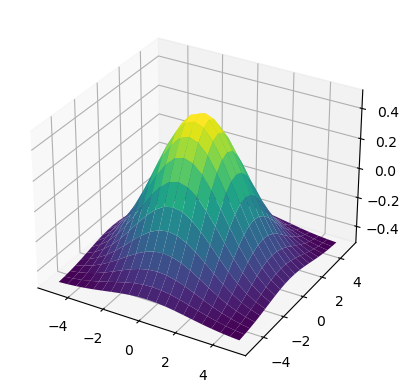

In [127]:
# Define the ranges for x and y
x = np.arange(-5, 5.5, 0.5)
y = np.arange(-5, 5.5, 0.5)

# Create meshgrid for x and y
X, Y = np.meshgrid(x, y)

# Calculate z values
Z = np.exp(-X**2 * 0.1) * np.exp(-Y**2 * 0.1) - 0.5

# Create the mesh plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Show the plot
plt.show()


In [128]:
x = np.arange(-5, 5.5, 0.5)
y = np.arange(-5, 5.5, 0.5)
X, Y = np.meshgrid(x, y)

# Calculate z (from previous code)
Z = np.exp(-X**2 * 0.1) * np.exp(-Y**2 * 0.1) - 0.5

# Reshape z to 1D array
ndata = X.size  # Total number of data points
targets = Z.reshape(1, ndata)

# Reshape X and Y to 1D arrays and stack them into patterns
patterns = np.vstack([X.reshape(1, ndata), Y.reshape(1, ndata)])

In [129]:
fapprox = MLP(patterns, targets, 0.01, 25)
fapprox.train(1000)

Epoch(0) MSE : 1.0546704628281212
Epoch(1) MSE : 1.0543200208206924
Epoch(2) MSE : 1.053638419189834
Epoch(3) MSE : 1.0526282439867967
Epoch(4) MSE : 1.0512762411342165
Epoch(5) MSE : 1.0495520596379355
Epoch(6) MSE : 1.0474045823843017
Epoch(7) MSE : 1.0447548857002025
Epoch(8) MSE : 1.041483808631133
Epoch(9) MSE : 1.03741012991139
Epoch(10) MSE : 1.0322513161253304
Epoch(11) MSE : 1.025550035438523
Epoch(12) MSE : 1.0165291964016971
Epoch(13) MSE : 1.0037865677491578
Epoch(14) MSE : 0.9845960931324386
Epoch(15) MSE : 0.9531464416142272
Epoch(16) MSE : 0.8958291879944201
Epoch(17) MSE : 0.7835416962842763
Epoch(18) MSE : 0.6376353714028852
Epoch(19) MSE : 0.6765641504919353
Epoch(20) MSE : 0.77611126205547
Epoch(21) MSE : 0.7690394476553778
Epoch(22) MSE : 0.6608520505950606
Epoch(23) MSE : 0.5589555085602766
Epoch(24) MSE : 0.5356985572151453
Epoch(25) MSE : 0.506147291457608
Epoch(26) MSE : 0.4484403011218531
Epoch(27) MSE : 0.475490168068789
Epoch(28) MSE : 0.5451339202693959
Epoc

Epoch(401) MSE : 0.005743648192002259
Epoch(402) MSE : 0.005687817320091519
Epoch(403) MSE : 0.005632559972411812
Epoch(404) MSE : 0.005577931846157931
Epoch(405) MSE : 0.005523992814184788
Epoch(406) MSE : 0.0054708059358791975
Epoch(407) MSE : 0.005418436451447504
Epoch(408) MSE : 0.005366950774848923
Epoch(409) MSE : 0.005316415499870518
Epoch(410) MSE : 0.005266896432989046
Epoch(411) MSE : 0.0052184576657107505
Epoch(412) MSE : 0.005171160698001049
Epoch(413) MSE : 0.005125063623212511
Epoch(414) MSE : 0.0050802203836318345
Epoch(415) MSE : 0.005036680104442731
Epoch(416) MSE : 0.004994486512557034
Epoch(417) MSE : 0.004953677445377426
Epoch(418) MSE : 0.004914284453094871
Epoch(419) MSE : 0.004876332496604487
Epoch(420) MSE : 0.004839839741602112
Epoch(421) MSE : 0.004804817447969331
Epoch(422) MSE : 0.004771269952203516
Epoch(423) MSE : 0.004739194739394702
Epoch(424) MSE : 0.004708582600068359
Epoch(425) MSE : 0.004679417866100228
Epoch(426) MSE : 0.004651678718904117
Epoch(427

Epoch(747) MSE : 0.004267352056086317
Epoch(748) MSE : 0.0042697884075150565
Epoch(749) MSE : 0.004272398573814957
Epoch(750) MSE : 0.004275179462069951
Epoch(751) MSE : 0.004278126598847642
Epoch(752) MSE : 0.004281234262332215
Epoch(753) MSE : 0.004284495616473141
Epoch(754) MSE : 0.004287902845314838
Epoch(755) MSE : 0.004291447285839204
Epoch(756) MSE : 0.004295119557838377
Epoch(757) MSE : 0.004298909689532512
Epoch(758) MSE : 0.004302807237851017
Epoch(759) MSE : 0.004306801402499633
Epoch(760) MSE : 0.00431088113313465
Epoch(761) MSE : 0.004315035229154827
Epoch(762) MSE : 0.004319252431797422
Epoch(763) MSE : 0.004323521508383787
Epoch(764) MSE : 0.004327831328700193
Epoch(765) MSE : 0.004332170933619481
Epoch(766) MSE : 0.004336529596168074
Epoch(767) MSE : 0.00434089687532107
Epoch(768) MSE : 0.004345262662866594
Epoch(769) MSE : 0.004349617223720457
Epoch(770) MSE : 0.004353951230095641
Epoch(771) MSE : 0.004358255789940549
Epoch(772) MSE : 0.004362522470057511
Epoch(773) MS

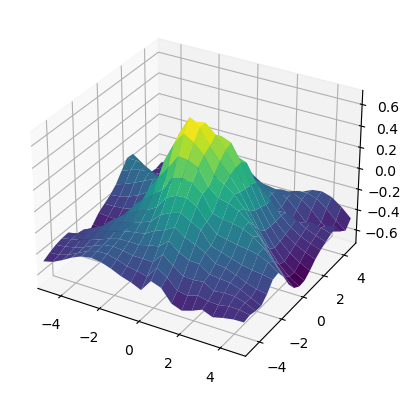

MSE: 0.01012412837389488


In [120]:
gridsize = len(x)  # Gridsize is the length of x or y (they should be equal)
_, out = fapprox.forward_pass()
zz = out.reshape(gridsize, gridsize)

# Create the mesh plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, zz, cmap='viridis')

# Set axis limits to match MATLAB's axis([-5 5 -5 5 -0.7 0.7])
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-0.7, 0.7])

# Show the plot
plt.show()

